In [1]:
# Task1: Data preprocessing and Data Exploration

In [2]:
# a) Used Pandas (Panel Data) to load the dataset and identify # of rows in Training data set and Test data set 

In [3]:
import pandas as pd 

In [4]:
trndata = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\trndata.csv")
tstdata = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\tstdata.csv")

In [5]:
# Training set : Rows and columns is 1000 and Columns is 13

In [6]:
print(trndata.shape)

(1000, 13)


In [7]:
# Training set : Features 

In [8]:
print("Number of features in the training set: "+ str(len(trndata.iloc[:, :-1].axes[1])))

Number of features in the training set: 12


In [9]:
# Test set : Rows and columns is 300 and Columns is 13

In [10]:
print(tstdata.shape)

(300, 13)


In [11]:
# Test set : Features 

In [12]:
print("Number of features in the test set: "+ str(len(tstdata.iloc[:, :-1].axes[1])))

Number of features in the test set: 12


In [13]:
# Training set : Number of data points in each class 

In [14]:
trndata["L"].value_counts()

1    343
3    341
2    316
Name: L, dtype: int64

In [15]:
# Test set : Number of data points in each class 

In [16]:
tstdata['L'].value_counts()

3    104
2     98
1     98
Name: L, dtype: int64

In [17]:
# Random permutations using shuffle

In [18]:
from sklearn.utils import shuffle
training_set_i = shuffle(trndata, random_state = 20018580)

In [19]:
# Pandas head() method is used to return top n (5 by default) - just to check the data sample

In [20]:
training_set_i.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
42,0.8427,0.2270,1.0943,0.3023,1.2949,0.2022,1.8863,-0.1803,2.0447,-0.0478,0.0029,1.7328,3
208,0.4360,0.3713,0.6214,0.6574,0.7203,0.7235,0.5825,0.6956,0.7206,0.7458,0.6731,0.5917,1
731,0.6361,0.0816,0.9489,0.1881,1.0334,0.2630,0.9601,0.1715,1.0037,0.3191,1.1462,-0.0483,1
584,0.4649,0.6439,0.7775,0.6826,0.9982,0.5638,1.7573,-0.0225,-0.0158,2.0113,0.0497,1.6713,3
932,0.2915,0.6952,0.5862,0.7160,0.8323,0.5673,1.6712,0.0701,0.0129,1.9853,0.0777,-0.0911,3


In [21]:
# d>  Scatter plot for the training set to compare two features F1 and F5

In [22]:
# Reference for different styles: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.13-Plot-Styles/

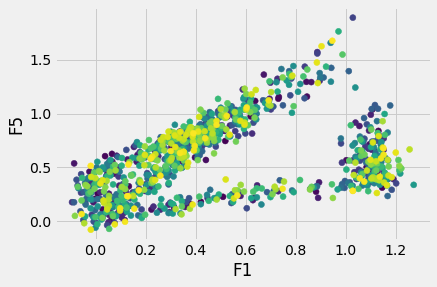

In [25]:
import matplotlib.pyplot as plt
import numpy
plt.style.use('fivethirtyeight')

#colors = ['red','green','blue','purple']

xy = numpy.zeros((2, 1000))
xy[0] = range(1000)
xy[1] = range(1000)
colors = [int(i % 1000) for i in xy[0]]

plt.scatter(trndata['F1'], trndata['F5'], c=colors)
#plt.scatter(trndata['F1'],trndata['F5'],c = trndata['L'])

plt.xlabel("F1")
plt.ylabel("F5")

plt.show()

In [104]:
######################################################################

In [ ]:
#Task 2  PCA on Training_set_i
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
#  Steps of PCA
# 1> Center and Scale the Data (Center=Avg value for each item will be zero; scaling=std deviation for each value will be 1)
# 2> create PCA object
# 3> Calculate loading scores and the variation each Principle component accounts for


In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = training_set_i.iloc[:,:-1]
cs = StandardScaler().fit(data)
scaled_data = cs.transform(data)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10','PCA_11','PCA_12']

In [208]:
test_data = tstdata.iloc[:,:-1]
scaled_test = cs.transform(test_data)
pca_test = pca.transform(scaled_test)

In [209]:
import seaborn as sns

data = pd.DataFrame(pca_data,columns = columns)

data = pd.concat([data, training_set_i[['L']]], axis = 1)

t_data = pd.DataFrame(pca_test,columns = columns)

t_data = pd.concat([t_data, tstdata[['L']]], axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

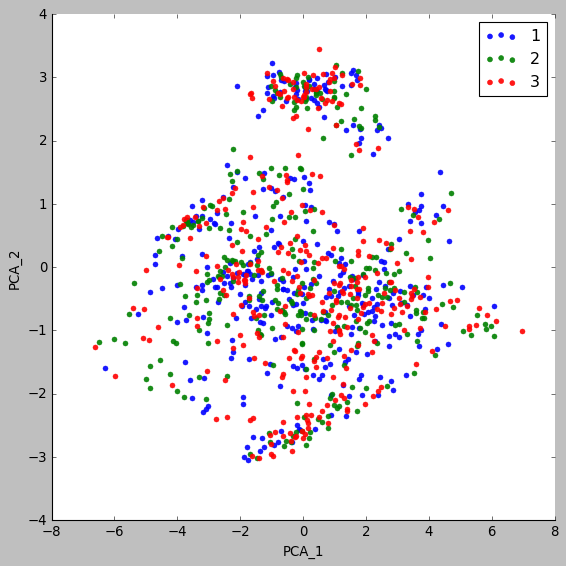

In [210]:
plt.style.use('classic')
fg = sns.lmplot(x = 'PCA_1',y = 'PCA_2',data=data,fit_reg=False,hue='L',legend=False,
           height = 7, aspect= 1, scatter_kws={'alpha':0.9 })
plt.legend()
plt.show

In [211]:
# Variance captured by each PCA - Create a graph using matplotlib

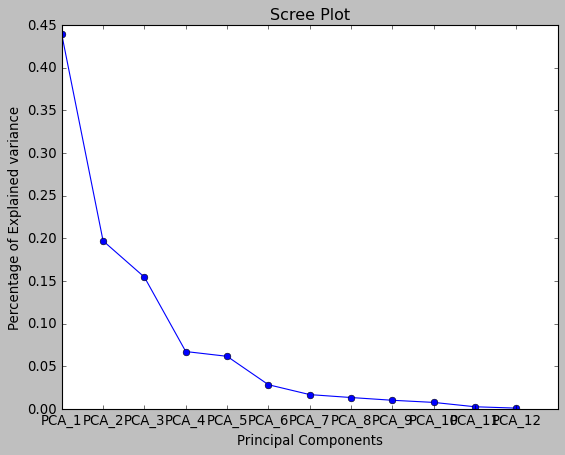

In [212]:
fig = plt.figure()
ab = plt.gca()

plt.plot(pca.explained_variance_ratio_,marker = 'o')
ab.set_xticks(range(0,12))
ab.set_xticklabels(columns)
ab.set_xlabel("Principal Components")
ab.set_ylabel("Percentage of Explained variance")
ab.set_title("Scree Plot")
plt.show()

In [213]:
cummulative?

In [214]:
import numpy as np
cummulative = pd.DataFrame(np.cumsum(pca.explained_variance_),index = columns)
cummulative.columns = ['Explained Variance']
cummulative

,Explained Variance
PCA_1,5.273139
PCA_2,7.639774
PCA_3,9.495959
PCA_4,10.304931
PCA_5,11.046627
PCA_6,11.388395
PCA_7,11.591100
PCA_8,11.752524
PCA_9,11.875415
PCA_10,11.968061


In [215]:
#Task2 - d - Plot two subplots in one figure

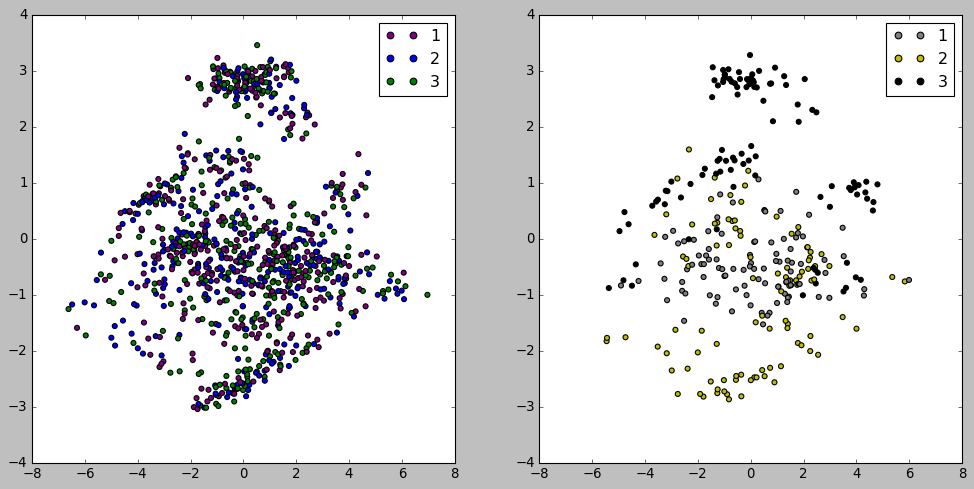

In [216]:
from matplotlib.colors import ListedColormap

plt.style.use('classic')

fig = plt.figure(2,figsize = (15,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

classes = ['1', '2', '3']
colours = ListedColormap(['purple','b','g'])
colours2 = ListedColormap(['grey','y','black'])

scatter = ax1.scatter(data.PCA_1,data.PCA_2,c = data.L, cmap = colours)

scatter2 = ax2.scatter(t_data.PCA_1,t_data.PCA_2,c = t_data.L, cmap = colours2)

ax1.legend(handles=scatter.legend_elements()[0], labels=classes)

ax2.legend(handles=scatter2.legend_elements()[0], labels=classes)
plt.show()

In [217]:
#######################################################################################

In [218]:
## Task 3

In [219]:
validation_set = training_set_i.tail(300)
print('Validation set shape(Rown X cols):', validation_set.shape)

Validation set shape(Rown X cols): (300, 13)


In [220]:
k = len(training_set_i)
k

1000

In [221]:
training_set_ii = training_set_i.head(k-300)
print('Training set ii shape(Rown X cols):',training_set_ii.shape)

Training set ii shape(Rown X cols): (700, 13)


In [222]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

x = training_set_ii.iloc[:,:-1]

y = training_set_ii['L']

x_val = validation_set.iloc[:,:-1]

y_val = validation_set['L']

st_sc = StandardScaler()

param = st_sc.fit(x)

scaled_x = st_sc.transform(x)

scaled_x_val = st_sc.transform(x_val)

In [223]:
training_r2 = []
validation_r2 = []

linear_reg = LinearRegression()

xlabel = y
ylabel = y_val
for i in range(1,13):
    x_data = scaled_x[:,:i]
    x_validation_data = scaled_x_val[:,:i]

    y_pred = linear_reg.fit(x_data, xlabel).predict(x_data)
    y_val_pred = linear_reg.predict(x_validation_data)
    
    training_r2.append(r2_score(xlabel,np.round(y_pred)))
    validation_r2.append(r2_score(ylabel,np.round(y_val_pred)))

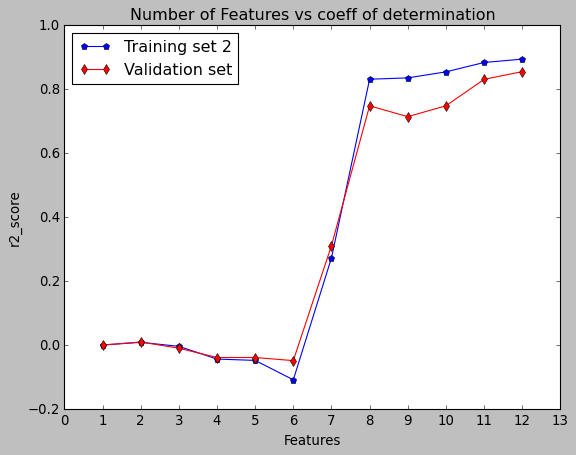

In [224]:
plt.style.use('classic')
plt.title("Number of Features vs coeff of determination")
plt.plot(range(1, 13),np.array(training_r2),marker = 'p', c = 'b', label = 'Training set 2')
plt.plot(range(1, 13), np.array(validation_r2),marker = 'd', c = 'r', label = 'Validation set')
plt.xlabel("Features")
plt.ylabel("r2_score")
plt.xticks(range(0, 14))
plt.legend(loc='best')
plt.show()

In [225]:
# 4 c : Number of features selected is 8, as there is very slight change from there after

In [226]:
regression = LinearRegression()

regression.fit(scaled_data[:,:8],training_set_i['L'])
y_pred_tr_i = regression.predict(scaled_data[:,:8])

y_val_pred_tr_i = regression.predict(scaled_test[:,:8])

print('Training set - score:',r2_score(training_set_i['L'],np.round(y_pred_tr_i)))
print('Testing set - score:',r2_score(tstdata['L'],np.round(y_val_pred_tr_i)))

Training set - score: 0.8143263995695881
Testing set - score: 0.8563503071131365


Task#5
a) Summary : 

Task1:

Datapoints reported, number of features in each class reported. Both test and training set have almost equal number of datapoints in each class means the data is balanced. Scatter plot of f5 vs f3 shows that they are linearly dependent.

Task 2:

Scree plot shows first 4 PCAs capture 85% of variance, scatter plot of PCA_1 vs PCA_2, reported explained variances, generated two subplots for train and test in 1 figure.

Task 3:

Split training set 1 into validation and training set 2.

Task 4:

Trained 12 regression models with 12 feature sets to compare their performances on training set 2, Learning curve plotted, 8 features gave best performance. implemented model on training set 1 and test set with 8 features.

In [ ]:
b) 
Using regression algorithm for a classification problem is the main problem. 
Solving the problem using classification techniques like logistic regression or 
naive bayes might give better results and donot overfit the data.